In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [3]:
df.shape

(10683, 11)

## # Price is our O/p Column

### Getting basic Info about our dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Basic Description of the data

In [5]:
#getting info about ALL columns

df.describe(include= "all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,Null,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8347,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Airline,10683,12,Jet Airways,3849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date_of_Journey,10683,44,18/05/2019,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,10683,5,Delhi,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,10683,6,Cochin,4537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Route,10682,128,DEL → BOM → COK,2376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dep_Time,10683,222,18:55,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arrival_Time,10683,1343,19:00,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,10683,368,2h 50m,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Stops,10682,5,1 stop,5625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Additional_Info,10683,10,Null,8347,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# getting info about Object data columns

df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,Null
freq,3849,504,4537,4537,2376,233,423,550,5625,8347


In [8]:
df.describe(include='O').T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,Null,8347


### Data Study

In [9]:
for i in df.columns:
    print(f'The unique value in feature {i} is: ', df[i].unique(), sep='\n')
    print('****************************************************************')

The unique value in feature Airline is: 
['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
****************************************************************
The unique value in feature Date_of_Journey is: 
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
****************************************************************
The unique value in f

In [10]:
for i in df.columns:
    print(f'The Count of values in feature {i} is: ', df[i].value_counts(), sep='\n')
    print('****************************************************************')

The Count of values in feature Airline is: 
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
****************************************************************
The Count of values in feature Date_of_Journey is: 
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
2

## EDA

### Merging different Classes of same airline together

In [11]:
# Method 1 - Using .replace()

# df.replace(to_replace='Jet Airways Business', value='Jet Airways', inplace=True)
# df.replace(to_replace='Vistara Premium economy', value='Vistara', inplace=True)
# df.replace(to_replace='Multiple carriers Premium economy', value='Multiple carriers', inplace=True)

# Method 2 - Using .loc()

df.loc[df['Airline'] == 'Jet Airways Business', 'Airline'] = 'Jet Airways'
df.loc[df['Airline'] == 'Vistara Premium economy', 'Airline'] = 'Vistara'
df.loc[df['Airline'] == 'Multiple carriers Premium economy', 'Airline'] = 'Multiple carriers'

df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648


In [12]:
# Validating if different Classes of same Airines have been merged together

df.loc[df['Airline']=='Vistara Premium Economy']
df.loc[df['Airline']=='Jet Airways Business']
df.loc[df['Airline']=='Multiple carriers Premium economy']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [13]:
df[(df['Airline']=='Jet Airways Business') | (df['Airline']=='Vistara Premium economy') | (df['Airline']=='Multiple carriers Premium economy')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


### # Airline Classes merged together

In [14]:
df['Airline'].value_counts()

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

## Making formats of journey dates consistent

In [15]:
df.Date_of_Journey.dtype

dtype('O')

In [16]:
df.Date_of_Journey= pd.to_datetime(df.Date_of_Journey)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [17]:
df.dtypes             # --> Formats of Date_of_Journey are now consistant as datetime64

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [18]:
df['Date_of_Journey'].unique()

array(['2019-03-24T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-09-06T00:00:00.000000000', '2019-12-05T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-06-24T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-05-27T00:00:00.000000000',
       '2019-01-06T00:00:00.000000000', '2019-04-18T00:00:00.000000000',
       '2019-09-05T00:00:00.000000000', '2019-04-24T00:00:00.000000000',
       '2019-03-03T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
       '2019-12-06T00:00:00.000000000', '2019-06-03T00:00:00.000000000',
       '2019-03-21T00:00:00.000000000', '2019-03-04T00:00:00.000000000',
       '2019-06-05T00:00:00.000000000', '2019-05-15T00:00:00.000000000',
       '2019-06-18T00:00:00.000000000', '2019-06-15T00:00:00.000000000',
       '2019-06-04T00:00:00.000000000', '2019-05-18T00:00:00.000000000',
       '2019-06-27T00:00:00.000000000', '2019-05-21T00:00:00.000000000',
       '2019-03-06T00:00:00.000000000', '2019-03-15

In [19]:
df.Date_of_Journey = pd.to_datetime(df.Date_of_Journey, dayfirst=True)
df[['Date_of_Journey']]

,Date_of_Journey
0,2019-03-24
1,2019-01-05
2,2019-09-06
3,2019-12-05
4,2019-01-03
...,...
10678,2019-09-04
10679,2019-04-27
10680,2019-04-27
10681,2019-01-03


### Extracting out Date, day and Week from Date of Journey

In [20]:
df['Journey_Date'] = df['Date_of_Journey'].dt.day
df['Journey_Day'] = df['Date_of_Journey'].dt.day_name()
df['Journey_Month'] = df['Date_of_Journey'].dt.month_name(locale = 'English')
df['Journey_Week'] = df['Date_of_Journey'].dt.week

pd.set_option('display.max_columns',40)

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,Sunday,March,12
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,5,Saturday,January,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,6,Friday,September,36
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,5,Thursday,December,49
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,3,Thursday,January,1


### Merging Same Places in Destination Column

In [21]:
df.replace('New Delhi', 'Delhi', inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,24,Sunday,March,12
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662,5,Saturday,January,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882,6,Friday,September,36
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218,5,Thursday,December,49
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302,3,Thursday,January,1


In [22]:
# Validating if Destination col is updated.

df.loc[df['Destination']=='New Delhi']

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week


In [23]:
df['Destination'].value_counts()

Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

### Making the Duration data consistent by converting them in total hours

In [24]:
df[['Duration']].head()

,Duration
0,2h 50m
1,7h 25m
2,19h
3,5h 25m
4,4h 45m


In [25]:
# Duration converted into hours & rounded up to 2 decimal places

df['Duration'] = pd.to_timedelta(df['Duration']).apply(lambda x: x.total_seconds())/3600
df[['Duration']].head().round(2)

,Duration
0,2.83
1,7.42
2,19.00
3,5.42
4,4.75


### Displaying ONLY rows with Null/ missing or NOT Null values in a specific col 

In [26]:
df[df['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week
9039,Air India,2019-06-05,Delhi,Cochin,NaN,09:45,09:25 07 May,23.666667,NaN,Null,7480,5,Wednesday,June,23


In [27]:
# displaying data ONLY with no null/NaN values

df[df["Route"].notnull()].head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2.833333,non-stop,Null,3897,24,Sunday,March,12
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.416667,2 stops,Null,7662,5,Saturday,January,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.000000,2 stops,Null,13882,6,Friday,September,36
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.416667,1 stop,Null,6218,5,Thursday,December,49
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4.750000,1 stop,Null,13302,3,Thursday,January,1


### Dropping Rows with at least 1 missing/ NaN value - 'Route' and 'Total_Stops' has NaN values

In [28]:
df.dropna(subset=['Route', 'Total_Stops'], inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2.833333,non-stop,Null,3897,24,Sunday,March,12
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7.416667,2 stops,Null,7662,5,Saturday,January,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19.000000,2 stops,Null,13882,6,Friday,September,36
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5.416667,1 stop,Null,6218,5,Thursday,December,49
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4.750000,1 stop,Null,13302,3,Thursday,January,1


In [29]:
df.isnull().value_counts()

Airline  Date_of_Journey  Source  Destination  Route  Dep_Time  Arrival_Time  Duration  Total_Stops  Additional_Info  Price  Journey_Date  Journey_Day  Journey_Month  Journey_Week
False    False            False   False        False  False     False         False     False        False            False  False         False        False          False           10682
dtype: int64

In [30]:
# Validating if Row with a Null Value is dropped.

df[df.Total_Stops.isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week


### Converting Total_stops into numbers

In [31]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [32]:
df[['Total_Stops']].isnull().value_counts()

Total_Stops
False          10682
dtype: int64

In [33]:
df.Total_Stops.replace({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}, inplace=True)
df['Total_Stops'].astype(int)

df[['Total_Stops']].head()

,Total_Stops
0,0
1,2
2,2
3,1
4,1


In [34]:
df['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

### Dropping Route Column (being not necessary) & Additional_Info Column (due to V high count of Null values)

In [35]:
df = df.drop({'Route', 'Additional_Info'}, axis=1)
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week
0,IndiGo,2019-03-24,Banglore,Delhi,22:20,01:10 22 Mar,2.833333,0,3897,24,Sunday,March,12
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7.416667,2,7662,5,Saturday,January,1
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25 10 Jun,19.000000,2,13882,6,Friday,September,36
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5.416667,1,6218,5,Thursday,December,49
4,IndiGo,2019-01-03,Banglore,Delhi,16:50,21:35,4.750000,1,13302,3,Thursday,January,1


In [36]:
# Getting count of Null values

df.isnull().value_counts()

Airline  Date_of_Journey  Source  Destination  Dep_Time  Arrival_Time  Duration  Total_Stops  Price  Journey_Date  Journey_Day  Journey_Month  Journey_Week
False    False            False   False        False     False         False     False        False  False         False        False          False           10682
dtype: int64

### Extracting out Hours and Minutes from Departure Time Col

In [37]:
df[['Dep_Time']]

,Dep_Time
0,22:20
1,05:50
2,09:25
3,18:05
4,16:50
...,...
10678,19:55
10679,20:45
10680,08:20
10681,11:30


In [38]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Dep_Time                   object
Arrival_Time               object
Duration                  float64
Total_Stops                 int64
Price                       int64
Journey_Date                int64
Journey_Day                object
Journey_Month              object
Journey_Week                int64
dtype: object

In [39]:
# Converting Dep_Time from dtype as "Object" to "datetime".

df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

df[['Dep_Time']].head()

,Dep_Time
0,2024-02-16 22:20:00
1,2024-02-16 05:50:00
2,2024-02-16 09:25:00
3,2024-02-16 18:05:00
4,2024-02-16 16:50:00


In [40]:
df.dtypes       # dtype of Dep_Time changed to datetime64

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Dep_Time           datetime64[ns]
Arrival_Time               object
Duration                  float64
Total_Stops                 int64
Price                       int64
Journey_Date                int64
Journey_Day                object
Journey_Month              object
Journey_Week                int64
dtype: object

In [41]:
df['Dep_Time_hours'] = df['Dep_Time'].dt.hour
df[['Dep_Time_hours']]

df['Dep_Time_min'] = df['Dep_Time'].dt.minute
df[['Dep_Time_min']]

df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week,Dep_Time_hours,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,Delhi,2024-02-16 22:20:00,01:10 22 Mar,2.833333,0,3897,24,Sunday,March,12,22,20
1,Air India,2019-01-05,Kolkata,Banglore,2024-02-16 05:50:00,13:15,7.416667,2,7662,5,Saturday,January,1,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,2024-02-16 09:25:00,04:25 10 Jun,19.000000,2,13882,6,Friday,September,36,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,2024-02-16 18:05:00,23:30,5.416667,1,6218,5,Thursday,December,49,18,5
4,IndiGo,2019-01-03,Banglore,Delhi,2024-02-16 16:50:00,21:35,4.750000,1,13302,3,Thursday,January,1,16,50


### Converting Arrrival Time in same format as Departure Time

In [42]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

df[['Arrival_Time']].head()

,Arrival_Time
0,2024-03-22 01:10:00
1,2024-02-16 13:15:00
2,2024-06-10 04:25:00
3,2024-02-16 23:30:00
4,2024-02-16 21:35:00


In [43]:
df['Arrival_Time_hour'] = df['Arrival_Time'].dt.hour
df[['Arrival_Time_hour']]

df['Arrival_Time_min'] = df['Arrival_Time'].dt.minute
df[['Arrival_Time_min']]

df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week,Dep_Time_hours,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,Delhi,2024-02-16 22:20:00,2024-03-22 01:10:00,2.833333,0,3897,24,Sunday,March,12,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,2024-02-16 05:50:00,2024-02-16 13:15:00,7.416667,2,7662,5,Saturday,January,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,2024-02-16 09:25:00,2024-06-10 04:25:00,19.000000,2,13882,6,Friday,September,36,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,2024-02-16 18:05:00,2024-02-16 23:30:00,5.416667,1,6218,5,Thursday,December,49,18,5,23,30
4,IndiGo,2019-01-03,Banglore,Delhi,2024-02-16 16:50:00,2024-02-16 21:35:00,4.750000,1,13302,3,Thursday,January,1,16,50,21,35


## Visualization

### 1. Univariate Analysis

### Number of flights for each source & Destination

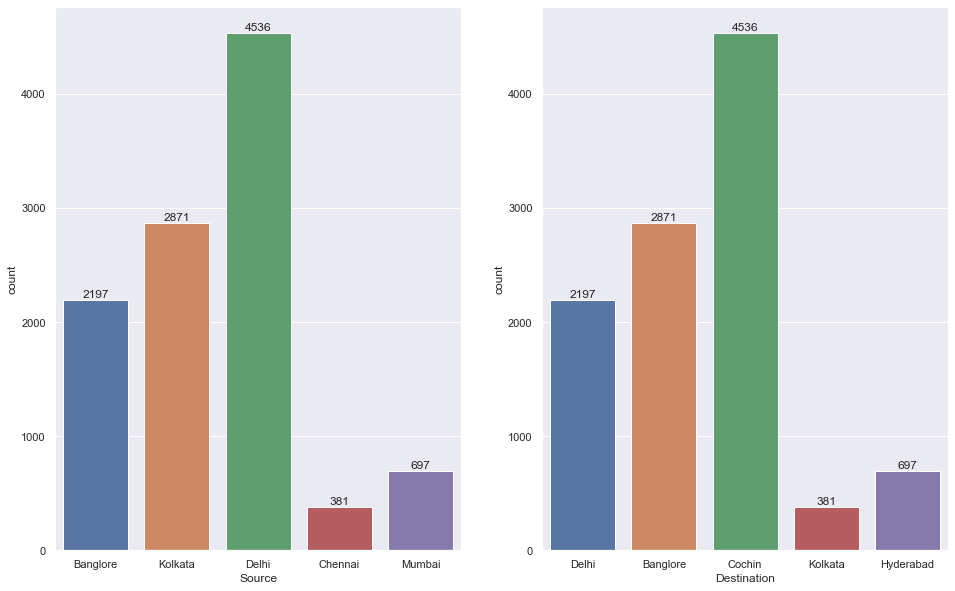

In [44]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
a = sns.countplot( df['Source'])

for i in a.containers:
    a.bar_label(i)

plt.subplot(1,2,2)
b = sns.countplot( df['Destination'])

for i in b.containers:
    b.bar_label(i)
plt.show()

In [45]:
# Observations -

# 1. Maximum flights (= 4536) are taking off from Delhi
# 1. Maximum flights (= 4536) are landing at Cochin

<function matplotlib.pyplot.show(close=None, block=None)>

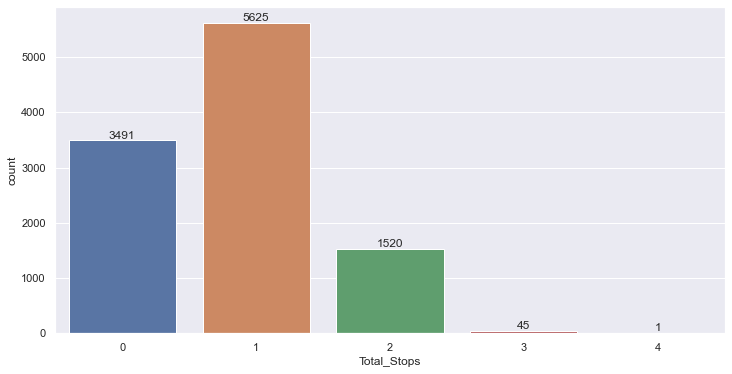

In [46]:
plt.figure(figsize= (12,6))
a = sns.countplot(df['Total_Stops'])

for i in a.containers:
    a.bar_label(i)
plt.show

In [47]:
# Max number of flights (= 5625) have only 1 stop in the journey

### Airlines with highest number of flights

<function matplotlib.pyplot.show(close=None, block=None)>

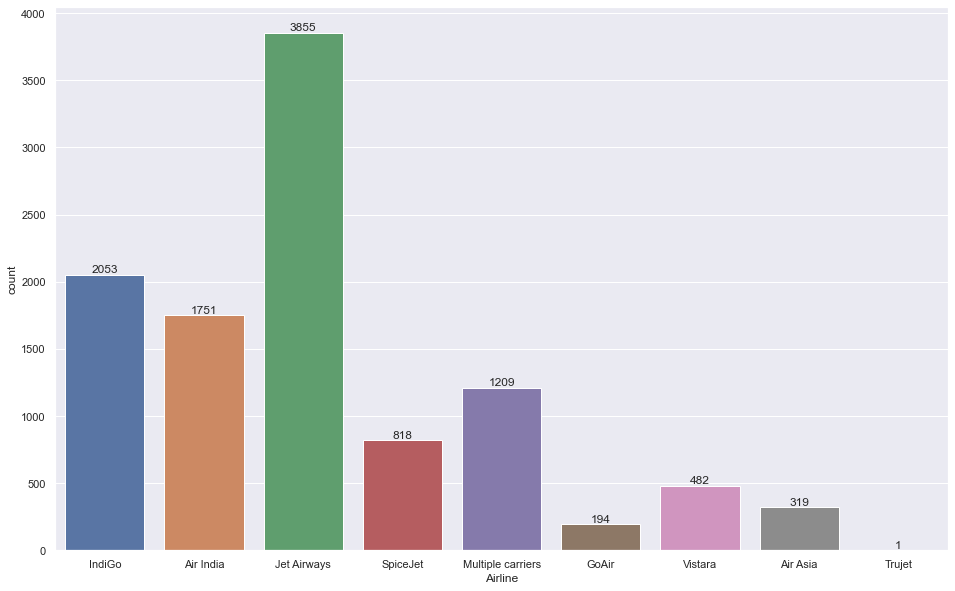

In [48]:
plt.figure(figsize= (16, 10))
a = sns.countplot(df['Airline'])

for i in a.containers:
    a.bar_label(i)

plt.show

In [49]:
# Jet Airways is the Airline with max number of flights (= 3855).

### Month with highest no. of flights

<function matplotlib.pyplot.show(close=None, block=None)>

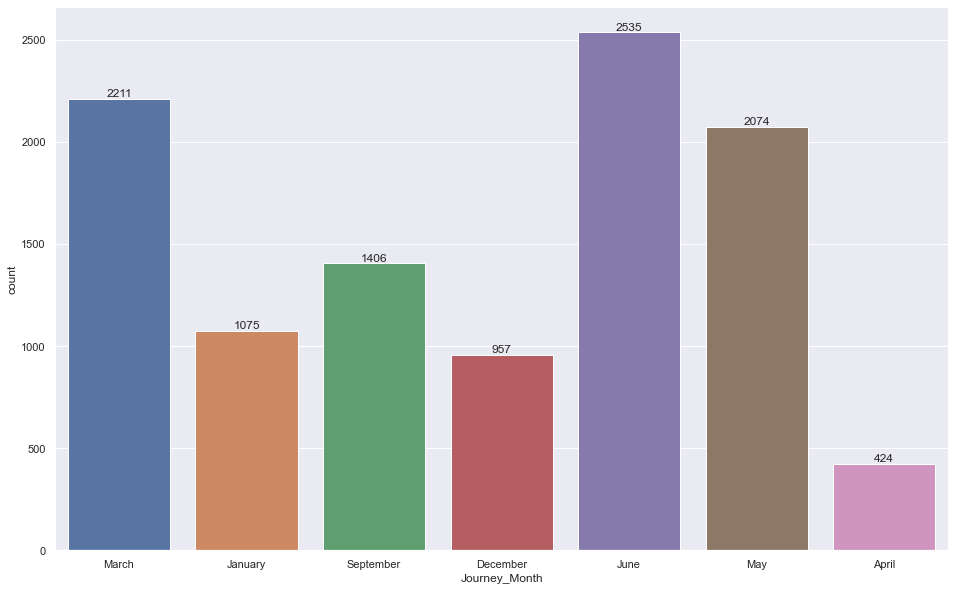

In [50]:
plt.figure(figsize= (16, 10))
a = sns.countplot(df['Journey_Month'])

for i in a.containers:
    a.bar_label(i)
plt.show

In [51]:
# Most of the passengers choose the month of June to travel. 
# June is the month with highest no. of flights (= 2535), followed by March and then May.

### Date & Days with highest no. of flights

<function matplotlib.pyplot.show(close=None, block=None)>

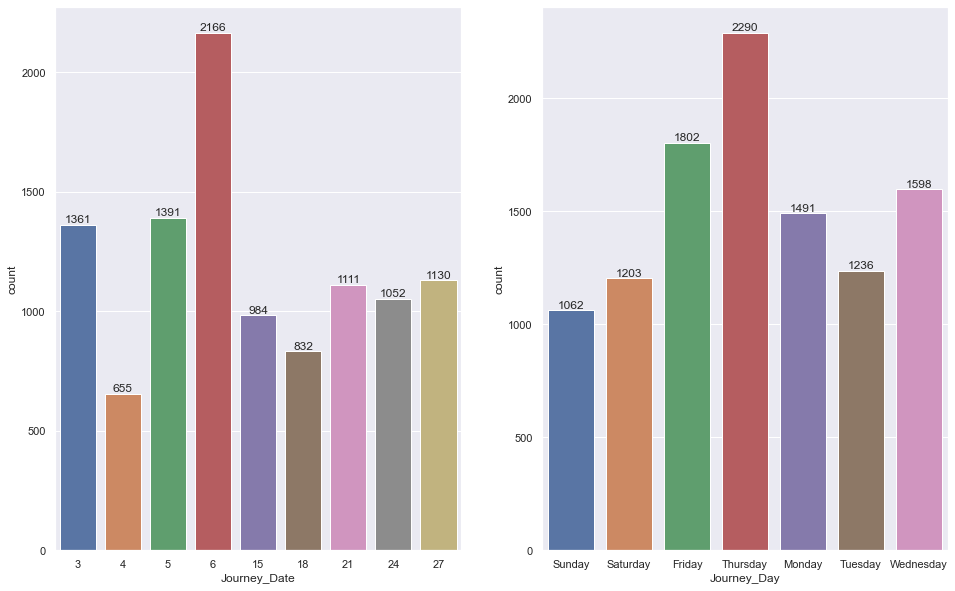

In [52]:
plt.figure(figsize=(16,10))

plt.subplot(1,2,1)
a = sns.countplot(data=df, x='Journey_Date')

for i in a.containers:
    a.bar_label(i)

plt.subplot(1,2,2)
b = sns.countplot(df['Journey_Day'])

for i in b.containers:
    b.bar_label(i)

plt.show

In [53]:
# Most of the passengers choose to travel in starting of the month, with 6th of any month being the date, when highest
# no. of flights are taking off.

# Mid of the week (Thursday) is the most favourite day of a week to travel for max no. of passengers.

###  Airlines ticket price

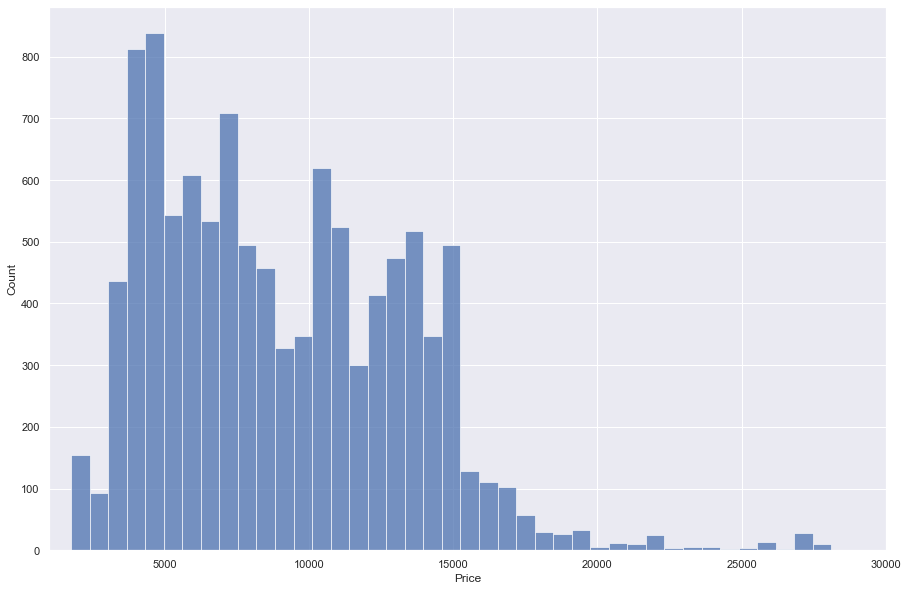

In [54]:
plt.figure(figsize=(15,10))
sns.histplot(df['Price'])
plt.xlim(1000,30000)
plt.show()

In [55]:
# Most frequest ticket Price offered by Airlines is slightly less than Rs. 5000.

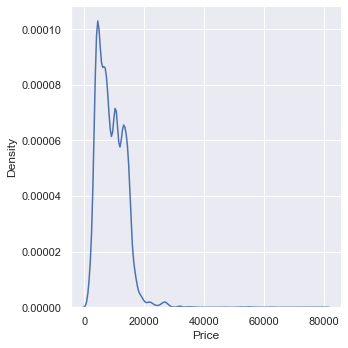

In [56]:
# Distributon Plot

sns.displot(df['Price'], kind= 'kde')       # Another way to write - sns.kdeplot(df.Price)

### Outliers detection

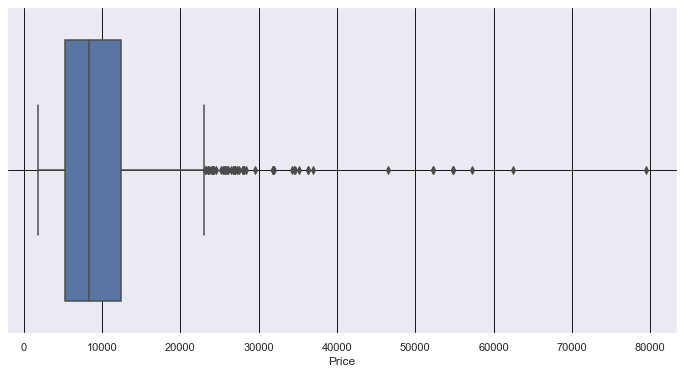

In [57]:
# Box Plot

# 1. Using seaborn

plt.figure(figsize=(12,6))
sns.boxplot(df['Price'])

plt.grid(True, color= 'k')
plt.show()

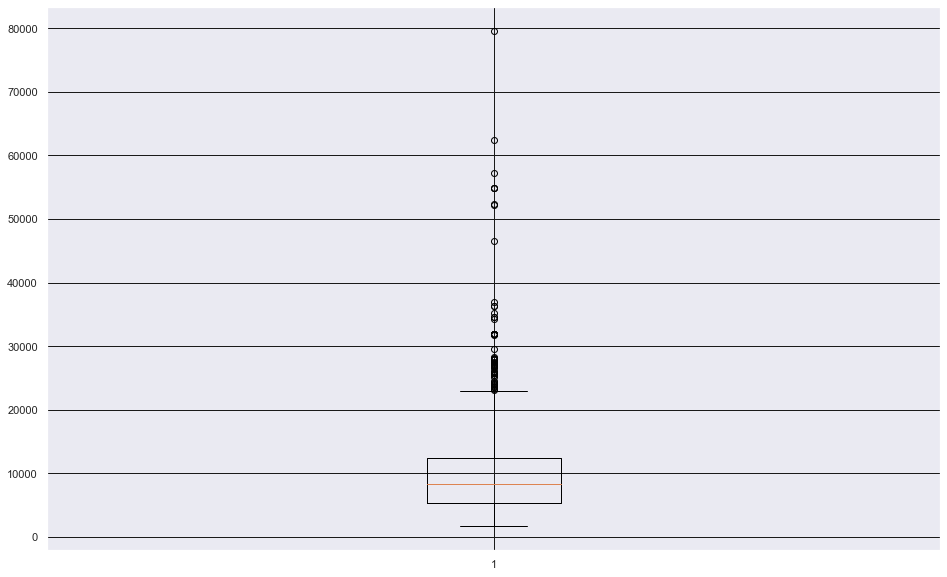

In [58]:
# 2. Using Matplotlib

plt.figure(figsize= (16,10))

box_range = plt.boxplot(df['Price'])

plt.grid(True, color= 'k')
plt.show()

In [59]:
df['Price'].quantile([0.25,0.5,0.75])

0.25     5277.0
0.50     8372.0
0.75    12373.0
Name: Price, dtype: float64

In [60]:
# IQR detection

IQR = df['Price'].quantile(.75) - df['Price'].quantile(0.25)
IQR

7096.0

In [61]:
# Getting Ul and LL for Flight Price Box Plot

[item.get_ydata()[0] for item in box_range['caps']]

[1759, 23001]

In [62]:
[item.get_ydata()[0] for item in box_range['medians']]

[8372.0]

In [63]:
[item.get_ydata()[0] for item in box_range['whiskers']]      # Whiskers are q1 and q3 values in box plot

[5277.0, 12373.0]

### Data in Outlier range

In [64]:
df[df['Price']> 12373][['Airline','Date_of_Journey','Source','Destination']]

,Airline,Date_of_Journey,Source,Destination
2,Jet Airways,2019-09-06,Delhi,Cochin
4,IndiGo,2019-01-03,Banglore,Delhi
7,Jet Airways,2019-01-03,Banglore,Delhi
15,Air India,2019-03-03,Delhi,Cochin
18,Air India,2019-12-06,Delhi,Cochin
...,...,...,...,...
10650,Jet Airways,2019-05-15,Kolkata,Banglore
10653,Jet Airways,2019-01-05,Kolkata,Banglore
10668,Jet Airways,2019-09-05,Delhi,Cochin
10673,Jet Airways,2019-05-27,Delhi,Cochin


### 2. Bivariate Analysis

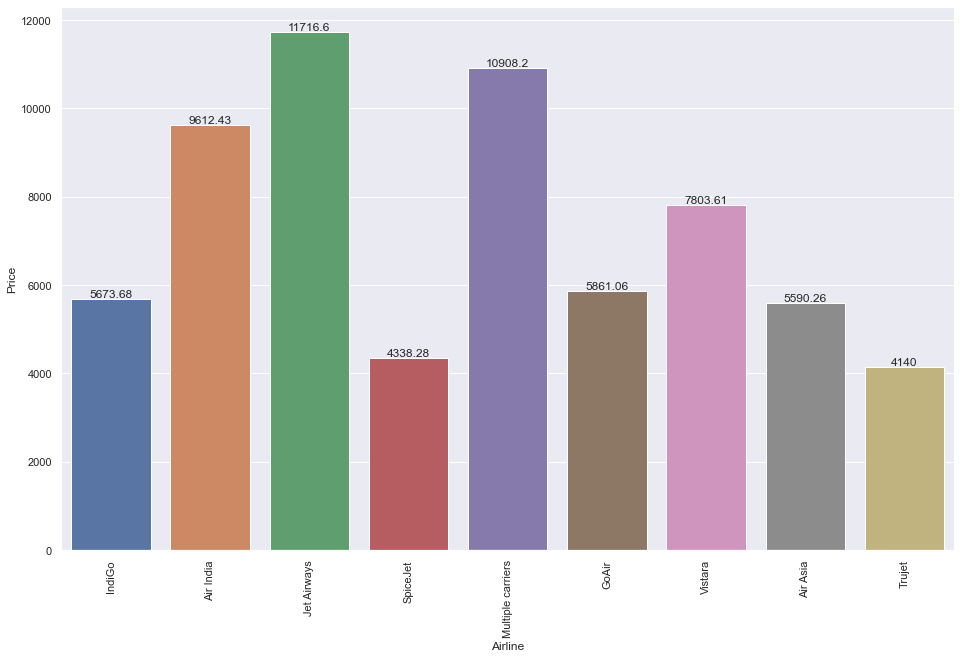

In [65]:
# Bar Plot

plt.figure(figsize=(16,10))
a = sns.barplot(x='Airline', y= 'Price', data= df, ci= None)
plt.xticks(rotation=90)

for i in a.containers:
    a.bar_label(i)
    
plt.show()

In [66]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week,Dep_Time_hours,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,Delhi,2024-02-16 22:20:00,2024-03-22 01:10:00,2.833333,0,3897,24,Sunday,March,12,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,2024-02-16 05:50:00,2024-02-16 13:15:00,7.416667,2,7662,5,Saturday,January,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,2024-02-16 09:25:00,2024-06-10 04:25:00,19.000000,2,13882,6,Friday,September,36,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,2024-02-16 18:05:00,2024-02-16 23:30:00,5.416667,1,6218,5,Thursday,December,49,18,5,23,30
4,IndiGo,2019-01-03,Banglore,Delhi,2024-02-16 16:50:00,2024-02-16 21:35:00,4.750000,1,13302,3,Thursday,January,1,16,50,21,35


In [67]:
df.Journey_Month.value_counts()

June         2535
March        2211
May          2074
September    1406
January      1075
December      957
April         424
Name: Journey_Month, dtype: int64

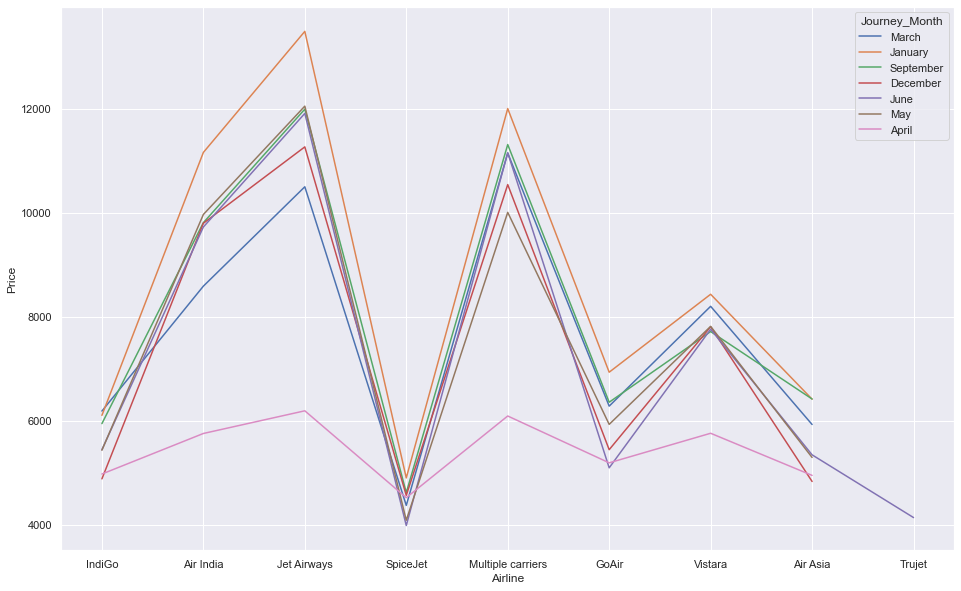

In [68]:
plt.figure(figsize= (16,10))
sns.lineplot(x='Airline', y='Price', data= df, ci= None, hue = 'Journey_Month') 

plt.show()

<Figure size 1296x864 with 0 Axes>

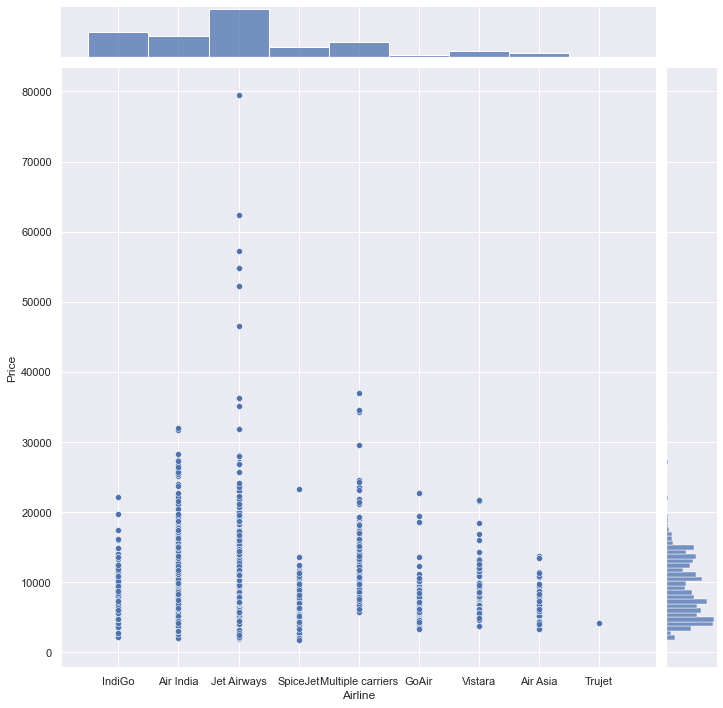

In [69]:
plt.figure(figsize= (18,12))
sns.jointplot(x= 'Airline', y= 'Price', data= df, height= 10, ratio= 10)

plt.show()

<Figure size 1152x720 with 0 Axes>

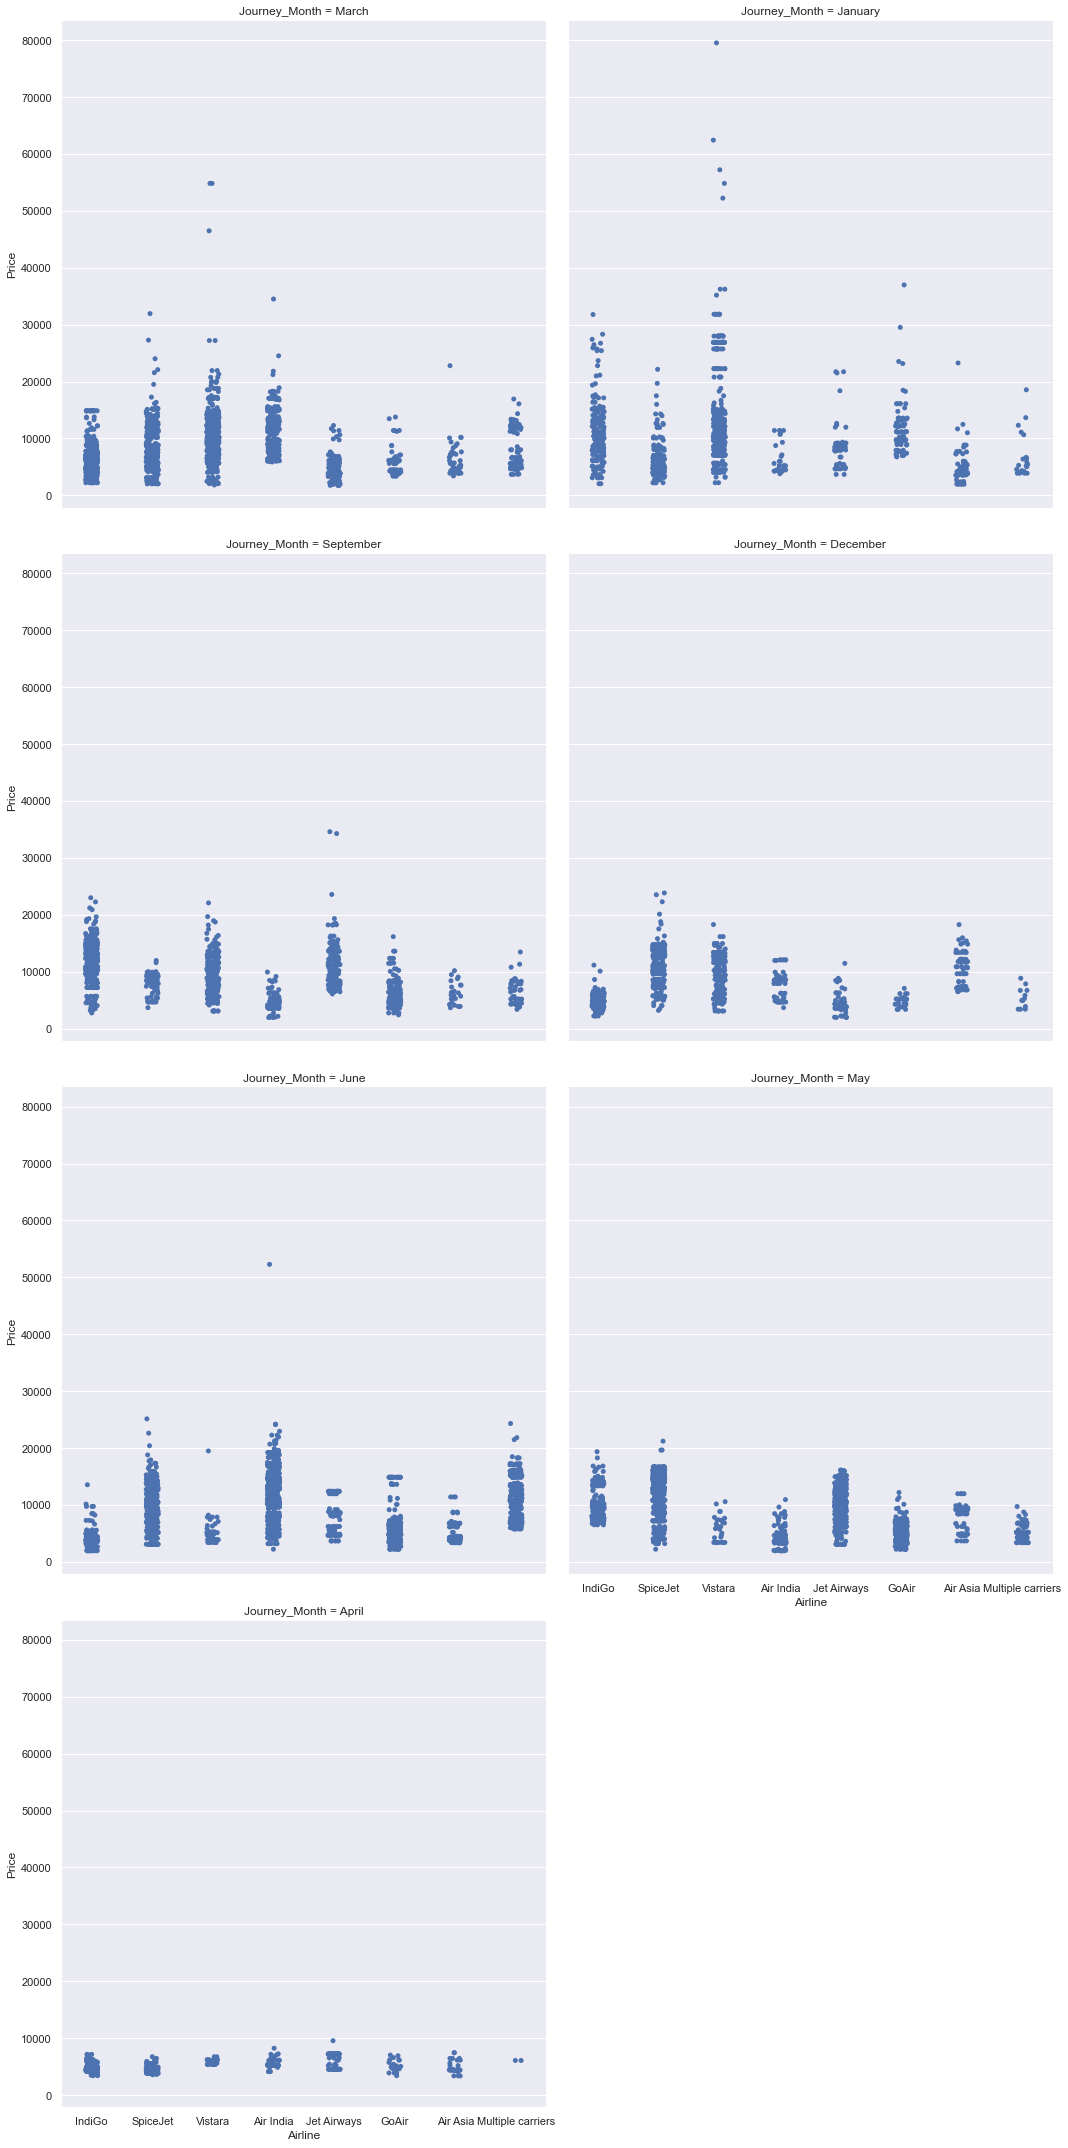

In [70]:
# Using FacetGrid

plt.figure(figsize= (16,10))
# Create a FacetGrid object
g = sns.FacetGrid(df, col="Journey_Month", col_wrap= 2, height= 7.5)

# Map a function to each facet
g.map(sns.stripplot, "Airline", "Price")

plt.show()

In [71]:
# Prices are generally higher in the month of January and lower in the month of April.

# Highest prices in the month of Jan are offered by - Vistara
# Highest prices in the month of March are offered by - Vistara
# Highest prices in the month of April are offered by - Jet Airways
# Highest prices in the month of May are offered by - Spice Jet
# Highest prices in the month of June are offered by - Air India
# Highest prices in the month of Sept are offered by - Jet Airways
# Highest prices in the month of Dec are offered by - Spice Jet

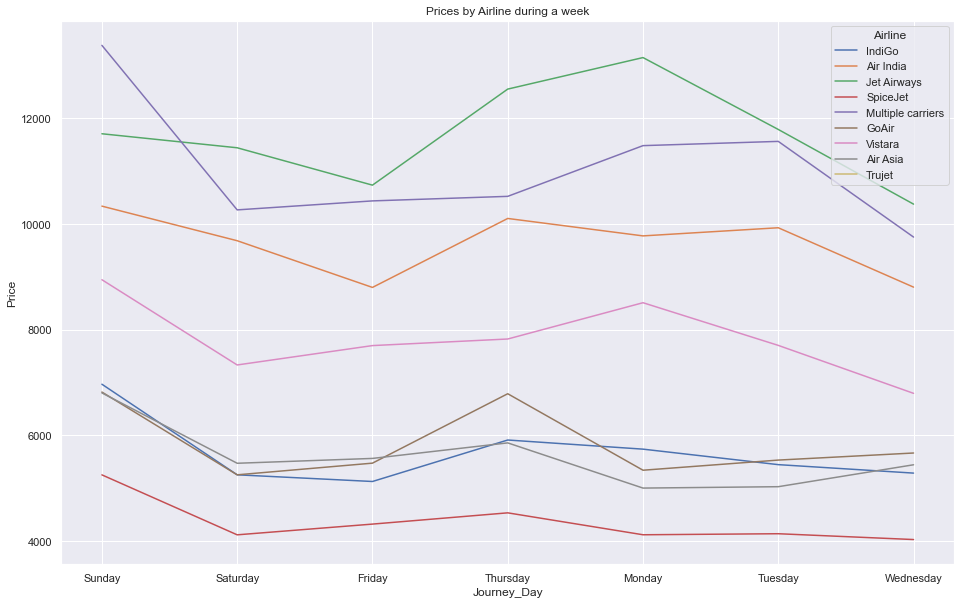

In [72]:
plt.figure(figsize = (16, 10))
sns.lineplot(x='Journey_Day', y='Price', data= df, ci=None, hue= 'Airline')

plt.title('Prices by Airline during a week')
plt.show()

In [73]:
# On Sunday -> offered prices are highest by "Multiple Carriers" and lowest by "Spice Jet" airlines respectively

# On rest of the days -> offered prices are highest by "Jet Airways" and lowest by "Spice Jet" airlines resp.

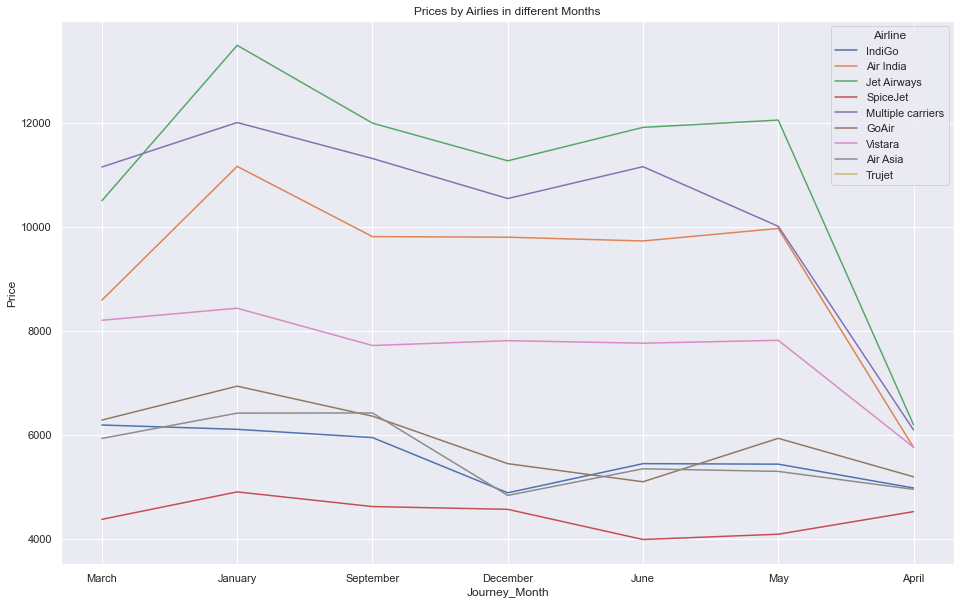

In [74]:
plt.figure(figsize = (16, 10))
sns.lineplot(x='Journey_Month', y='Price', data= df, ci=None, hue= 'Airline')

plt.title('Prices by Airlies in different Months')
plt.show()

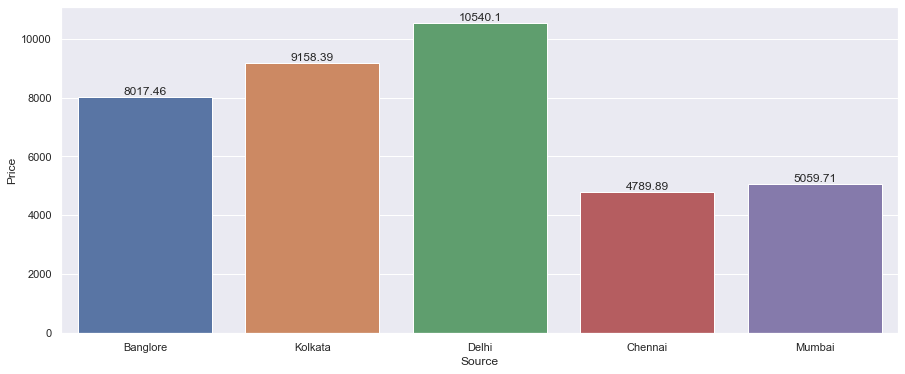

In [75]:
# Plotting Source & Destination vs Price

plt.figure(figsize=(15,6))

a = sns.barplot(x='Source', y='Price', data= df, ci= None)

for i in a.containers:
    a.bar_label(i)

plt.show()

<AxesSubplot:xlabel='Airline', ylabel='Total_Stops'>

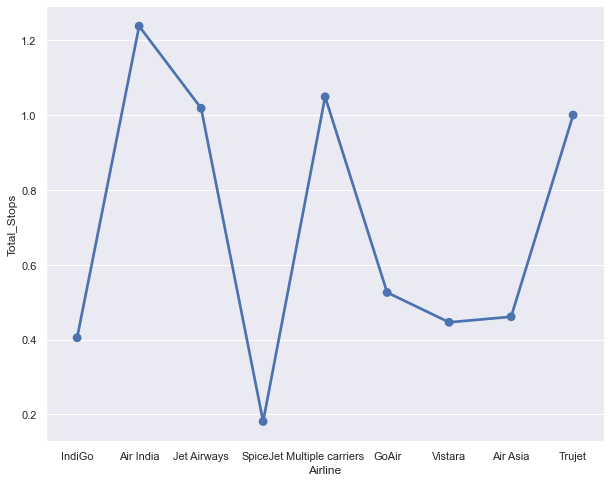

In [76]:
plt.figure(figsize = (10, 8))
sns.pointplot(x='Airline', y='Total_Stops', data= df, ci= None)

<AxesSubplot:xlabel='Airline', ylabel='Total_Stops'>

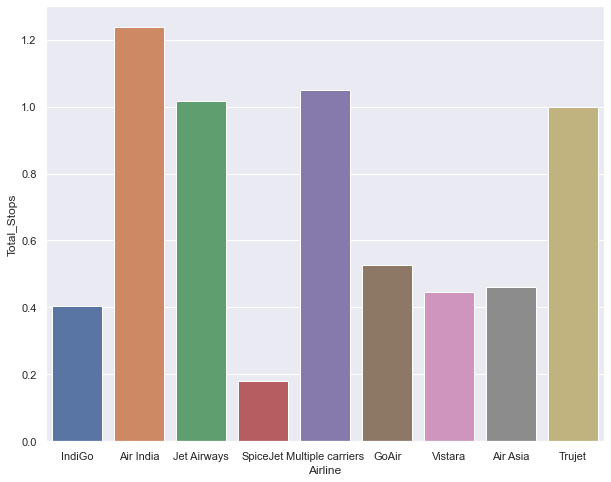

In [77]:
plt.figure(figsize = (10, 8))
sns.barplot(x='Airline', y='Total_Stops', data= df, ci= None)

In [78]:
# "Air India" flights have maximum number of stops in the journey and "Spice Jet" has least no. of stops

<Figure size 1440x720 with 0 Axes>

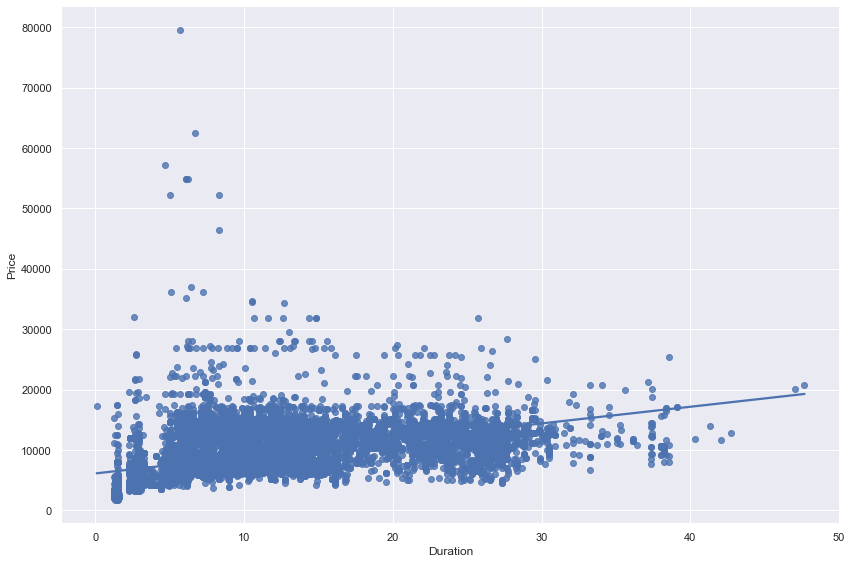

In [79]:
plt.figure(figsize=(20, 10))

sns.lmplot(x='Duration', y='Price', data= df, height = 8, aspect = 1.5, ci = None)

plt.show()

In [80]:
# Flights with less duration have higher prices

<AxesSubplot:xlabel='Total_Stops', ylabel='Duration'>

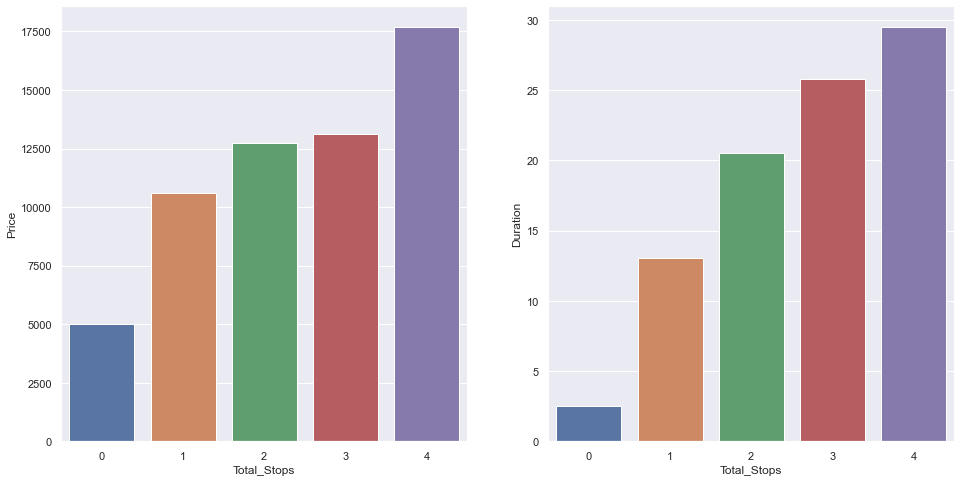

In [81]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.barplot(x='Total_Stops', y='Price', data= df, ci= None)

plt.subplot(1,2,2)
sns.barplot(x='Total_Stops', y='Duration', data= df, ci= None)

In [82]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Date,Journey_Day,Journey_Month,Journey_Week,Dep_Time_hours,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,Delhi,2024-02-16 22:20:00,2024-03-22 01:10:00,2.833333,0,3897,24,Sunday,March,12,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,2024-02-16 05:50:00,2024-02-16 13:15:00,7.416667,2,7662,5,Saturday,January,1,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,2024-02-16 09:25:00,2024-06-10 04:25:00,19.000000,2,13882,6,Friday,September,36,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,2024-02-16 18:05:00,2024-02-16 23:30:00,5.416667,1,6218,5,Thursday,December,49,18,5,23,30
4,IndiGo,2019-01-03,Banglore,Delhi,2024-02-16 16:50:00,2024-02-16 21:35:00,4.750000,1,13302,3,Thursday,January,1,16,50,21,35


In [83]:
df_num = df.select_dtypes(include = 'number')
df_num

,Duration,Total_Stops,Price,Journey_Date,Journey_Week,Dep_Time_hours,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,2.833333,0,3897,24,12,22,20,1,10
1,7.416667,2,7662,5,1,5,50,13,15
2,19.000000,2,13882,6,36,9,25,4,25
3,5.416667,1,6218,5,49,18,5,23,30
4,4.750000,1,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...
10678,2.500000,0,4107,4,36,19,55,22,25
10679,2.583333,0,4145,27,17,20,45,23,20
10680,3.000000,0,7229,27,17,8,20,11,20
10681,2.666667,0,12648,3,1,11,30,14,10


In [84]:
df1 =df_num.drop(['Dep_Time_hours', 'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min'], axis= 1)
df1

,Duration,Total_Stops,Price,Journey_Date,Journey_Week
0,2.833333,0,3897,24,12
1,7.416667,2,7662,5,1
2,19.000000,2,13882,6,36
3,5.416667,1,6218,5,49
4,4.750000,1,13302,3,1
...,...,...,...,...,...
10678,2.500000,0,4107,4,36
10679,2.583333,0,4145,27,17
10680,3.000000,0,7229,27,17
10681,2.666667,0,12648,3,1


### 3. Multivariate Analysis

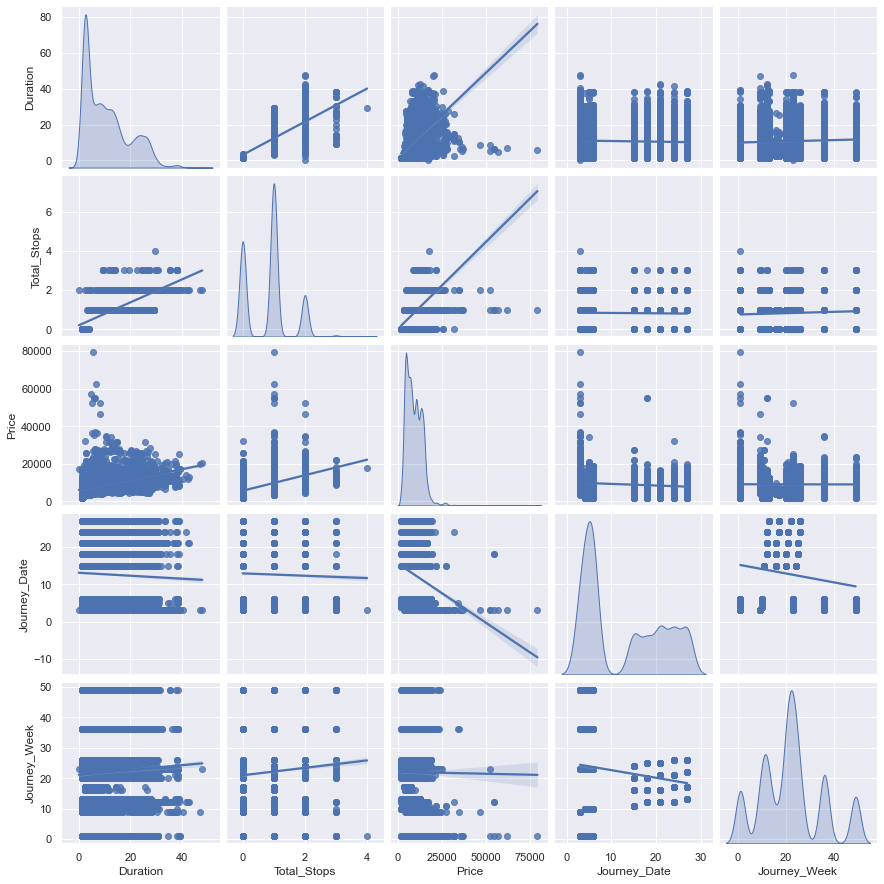

In [85]:
# Since scatter plot is not good for categorical col, but ONLY for Numerical columns, we considered df with Num col only.

sns.pairplot(df1, kind ='reg',diag_kind = 'kde')

## # CORRELATION AND HEATMAP

<AxesSubplot:>

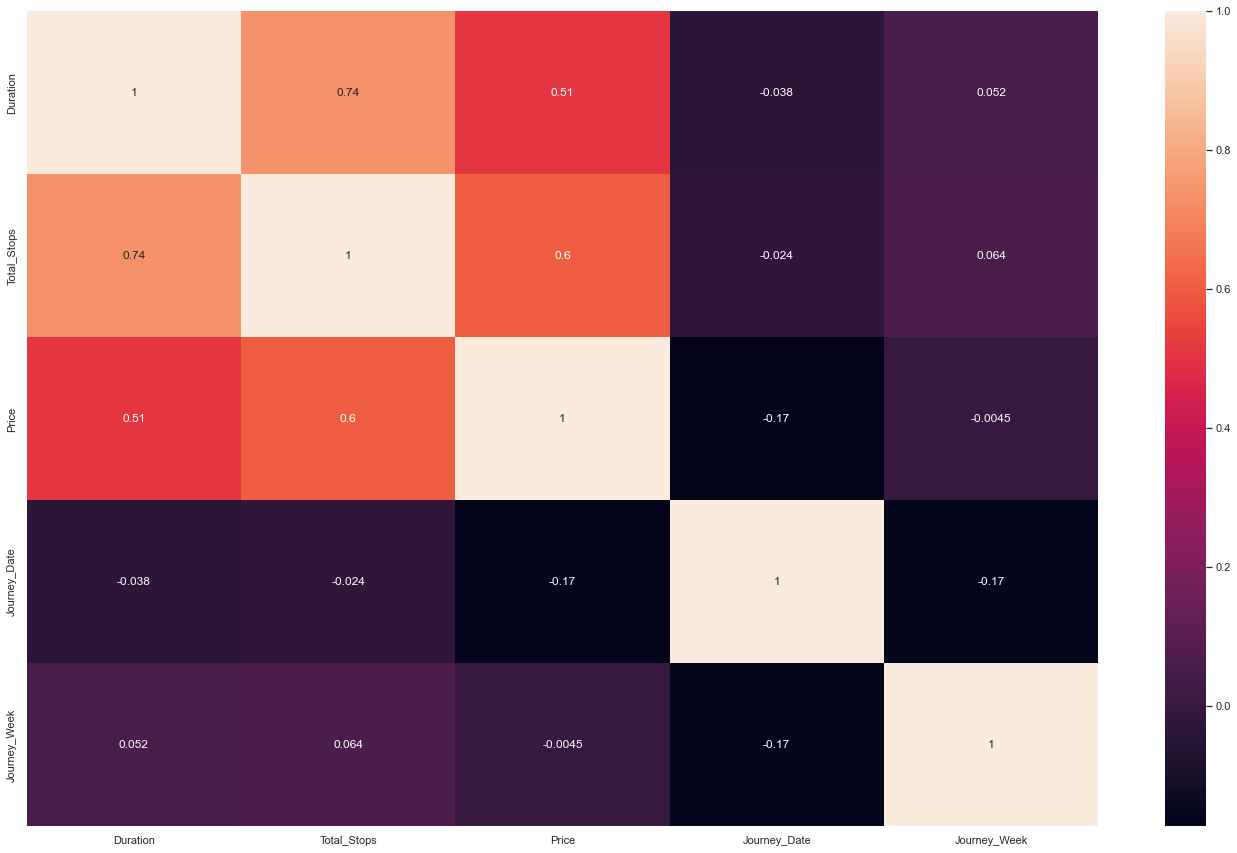

In [86]:
# Dateframe with ONLY Numerical data considered

plt.figure(figsize=(24, 15))

sns.heatmap(df1.corr(), annot = True)